# Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns
from datetime import date
from scipy import stats
from scipy.stats import norm, skew #for some statistics

import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.colors import n_colors
from plotly.subplots import make_subplots

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)
plt.style.use('seaborn')

from collections import Counter
import datetime
import wordcloud
import json

# Data Exploration

## Load Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/startup_data.csv')

In [ ]:
df.head(10)

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,labels,founded_at,closed_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,state_code.1,is_CA,is_NY,is_MA,is_TX,is_otherstate,category_code,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,NaN,Bandsintown,1,01-01-07,01-01-01,04-01-09,01-01-10,2.2493,3.0027,4.6685,6.7041,3,3,375000,3,CA,1,0,0,0,0,music,0,0,0,0,0,0,0,0,0,1,c:6669,0,1,0,0,0,0,1.0000,0,acquired
1,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,NaN,TriCipher,1,01-01-00,02-01-01,14-02-05,28-12-09,5.1260,9.9973,7.0055,7.0055,9,4,40100000,1,CA,1,0,0,0,0,enterprise,0,0,0,1,0,0,0,0,0,0,c:16283,1,0,0,1,1,1,4.7500,1,acquired
2,1001,CA,32.901049,-117.192656,92121,c:65620,San Diego,San Diego CA 92121,Plixi,1,18-03-09,01-01-05,30-03-10,30-03-10,1.0329,1.0329,1.4575,2.2055,5,1,2600000,2,CA,1,0,0,0,0,web,0,1,0,0,0,0,0,0,0,0,c:65620,0,0,1,0,0,0,4.0000,1,acquired
3,738,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Cupertino CA 95014,Solidcore Systems,1,01-01-02,01-01-07,17-02-05,25-04-07,3.1315,5.3151,6.0027,6.0027,5,3,40000000,1,CA,1,0,0,0,0,software,1,0,0,0,0,0,0,0,0,0,c:42668,0,0,0,1,1,1,3.3333,1,acquired
4,1002,CA,37.779281,-122.419236,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,0,08-01-10,19-02-07,08-01-10,04-01-12,0.0000,1.6685,0.0384,0.0384,2,2,1300000,1,CA,1,0,0,0,0,games_video,0,0,0,0,0,1,0,0,0,0,c:65806,1,1,0,0,0,0,1.0000,1,closed
5,379,CA,37.406914,-122.090370,94043,c:22898,Mountain View,Mountain View CA 94043,Matisse Networks,0,01-01-02,13-12-07,18-07-06,18-07-06,4.5452,4.5452,5.0027,5.0027,3,1,7500000,1,CA,1,0,0,0,0,network_hosting,0,0,0,0,0,0,0,0,0,1,c:22898,0,0,0,1,0,0,3.0000,1,closed
6,195,CA,37.391559,-122.070264,94041,c:16191,Mountain View,NaN,RingCube Technologies,1,01-01-05,01-01-08,21-09-06,18-03-10,1.7205,5.2110,3.0000,6.6082,6,3,26000000,2,CA,1,0,0,0,0,software,1,0,0,0,0,0,0,0,0,0,c:16191,1,0,1,1,0,0,1.6667,1,acquired
7,875,CA,38.057107,-122.513742,94901,c:5192,San Rafael,NaN,ClairMail,1,01-01-04,01-01-08,24-08-05,10-04-10,1.6466,6.7616,5.6055,7.3616,25,3,34100000,3,CA,1,0,0,0,0,finance,0,0,0,0,0,0,0,0,0,1,c:5192,0,0,1,1,0,1,3.5000,1,acquired
8,16,MA,42.712207,-73.203599,1267,c:1043,Williamstown,Williamstown MA 1267,VoodooVox,1,01-01-02,05-01-08,08-02-05,02-08-13,3.5863,11.1123,8.0055,9.9945,13,3,9650000,4,MA,0,0,1,0,0,mobile,0,0,1,0,0,0,0,0,0,0,c:1043,1,0,1,0,0,1,4.0000,1,acquired
9,846,CA,37.427235,-122.145783,94306,c:498,Palo Alto,NaN,Doostang,1,06-01-05,10-01-08,02-01-07,02-05-10,1.6712,4.6849,2.9178,6.1151,14,3,5750000,4,CA,1,0,0,0,0,web,0,1,0,0,0,0,0,0,0,0,c:498,1,1,1,0,0,0,1.0000,1,acquired


## Indentify Data Type

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 923 entries, 0 to 922
Data columns (total 49 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                923 non-null    int64  
 1   state_code                923 non-null    object 
 2   latitude                  923 non-null    float64
 3   longitude                 923 non-null    float64
 4   zip_code                  923 non-null    object 
 5   id                        923 non-null    object 
 6   city                      923 non-null    object 
 7   Unnamed: 6                430 non-null    object 
 8   name                      923 non-null    object 
 9   labels                    923 non-null    int64  
 10  founded_at                923 non-null    object 
 11  closed_at                 335 non-null    object 
 12  first_funding_at          923 non-null    object 
 13  last_funding_at           923 non-null    object 
 14  age_first_

In [ ]:
df.columns

Index(['Unnamed: 0', 'state_code', 'latitude', 'longitude', 'zip_code', 'id',
       'city', 'Unnamed: 6', 'name', 'labels', 'founded_at', 'closed_at',
       'first_funding_at', 'last_funding_at', 'age_first_funding_year',
       'age_last_funding_year', 'age_first_milestone_year',
       'age_last_milestone_year', 'relationships', 'funding_rounds',
       'funding_total_usd', 'milestones', 'state_code.1', 'is_CA', 'is_NY',
       'is_MA', 'is_TX', 'is_otherstate', 'category_code', 'is_software',
       'is_web', 'is_mobile', 'is_enterprise', 'is_advertising',
       'is_gamesvideo', 'is_ecommerce', 'is_biotech', 'is_consulting',
       'is_othercategory', 'object_id', 'has_VC', 'has_angel', 'has_roundA',
       'has_roundB', 'has_roundC', 'has_roundD', 'avg_participants',
       'is_top500', 'status'],
      dtype='object')

## Numeric Data

In [ ]:
numeric=['int8', 'int16', 'int32', 'int64', 'float16', 'float32', 'float64']
df_num=df.select_dtypes(include=numeric)
df_num.head(3)

,Unnamed: 0,latitude,longitude,labels,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,is_CA,is_NY,is_MA,is_TX,is_otherstate,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500
0,1005,42.358880,-71.056820,1,2.2493,3.0027,4.6685,6.7041,3,3,375000,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1.00,0
1,204,37.238916,-121.973718,1,5.1260,9.9973,7.0055,7.0055,9,4,40100000,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,1,4.75,1
2,1001,32.901049,-117.192656,1,1.0329,1.0329,1.4575,2.2055,5,1,2600000,2,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,4.00,1


## Categorical Data

In [ ]:
df_cat=df.select_dtypes(include='object')
df_cat.head(3)

,state_code,zip_code,id,city,Unnamed: 6,name,founded_at,closed_at,first_funding_at,last_funding_at,state_code.1,category_code,object_id,status
0,CA,92101,c:6669,San Diego,NaN,Bandsintown,01-01-07,01-01-01,04-01-09,01-01-10,CA,music,c:6669,acquired
1,CA,95032,c:16283,Los Gatos,NaN,TriCipher,01-01-00,02-01-01,14-02-05,28-12-09,CA,enterprise,c:16283,acquired
2,CA,92121,c:65620,San Diego,San Diego CA 92121,Plixi,18-03-09,01-01-05,30-03-10,30-03-10,CA,web,c:65620,acquired


### Changing 'Status' data value

In [ ]:
df['status'] = df['status'].replace({'closed': 0, 'acquired': 1})

In [ ]:
df.head()

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,labels,founded_at,closed_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,state_code.1,is_CA,is_NY,is_MA,is_TX,is_otherstate,category_code,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,NaN,Bandsintown,1,01-01-07,01-01-01,04-01-09,01-01-10,2.2493,3.0027,4.6685,6.7041,3,3,375000,3,CA,1,0,0,0,0,music,0,0,0,0,0,0,0,0,0,1,c:6669,0,1,0,0,0,0,1.0000,0,1
1,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,NaN,TriCipher,1,01-01-00,02-01-01,14-02-05,28-12-09,5.1260,9.9973,7.0055,7.0055,9,4,40100000,1,CA,1,0,0,0,0,enterprise,0,0,0,1,0,0,0,0,0,0,c:16283,1,0,0,1,1,1,4.7500,1,1
2,1001,CA,32.901049,-117.192656,92121,c:65620,San Diego,San Diego CA 92121,Plixi,1,18-03-09,01-01-05,30-03-10,30-03-10,1.0329,1.0329,1.4575,2.2055,5,1,2600000,2,CA,1,0,0,0,0,web,0,1,0,0,0,0,0,0,0,0,c:65620,0,0,1,0,0,0,4.0000,1,1
3,738,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Cupertino CA 95014,Solidcore Systems,1,01-01-02,01-01-07,17-02-05,25-04-07,3.1315,5.3151,6.0027,6.0027,5,3,40000000,1,CA,1,0,0,0,0,software,1,0,0,0,0,0,0,0,0,0,c:42668,0,0,0,1,1,1,3.3333,1,1
4,1002,CA,37.779281,-122.419236,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,0,08-01-10,19-02-07,08-01-10,04-01-12,0.0000,1.6685,0.0384,0.0384,2,2,1300000,1,CA,1,0,0,0,0,games_video,0,0,0,0,0,1,0,0,0,0,c:65806,1,1,0,0,0,0,1.0000,1,0


In [ ]:
df.drop(["labels"], axis=1, inplace=True)

# Exploratory Data Analysis (EDA)

## Statistical Summary

In [ ]:
describeNum = df.describe(include =['float64', 'int64', 'float', 'int'])
describeNum

,Unnamed: 0,latitude,longitude,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,is_CA,is_NY,is_MA,is_TX,is_otherstate,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
count,923.000000,923.000000,923.000000,923.000000,923.000000,771.000000,771.000000,923.000000,923.000000,9.230000e+02,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.00000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000
mean,572.297941,38.517442,-103.539212,2.235630,3.931456,3.055353,4.754423,7.710726,2.310943,2.541975e+07,1.841820,0.527627,0.114843,0.089924,0.045504,0.221018,0.165764,0.156013,0.08559,0.079090,0.067172,0.056338,0.027086,0.036836,0.003250,0.322860,0.326111,0.254605,0.508126,0.392199,0.232936,0.099675,2.838586,0.809317,0.646804
std,333.585431,3.741497,22.394167,2.510449,2.967910,2.977057,3.212107,7.265776,1.390922,1.896344e+08,1.322632,0.499507,0.319005,0.286228,0.208519,0.415158,0.372070,0.363064,0.27991,0.270025,0.250456,0.230698,0.162421,0.188462,0.056949,0.467823,0.469042,0.435875,0.500205,0.488505,0.422931,0.299729,1.874601,0.393052,0.478222
min,1.000000,25.752358,-122.756956,-9.046600,-9.046600,-14.169900,-7.005500,0.000000,1.000000,1.100000e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,283.500000,37.388869,-122.198732,0.576700,1.669850,1.000000,2.411000,3.000000,1.000000,2.725000e+06,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.500000,1.000000,0.000000
50%,577.000000,37.779281,-118.374037,1.446600,3.528800,2.520500,4.476700,5.000000,2.000000,1.000000e+07,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.500000,1.000000,1.000000
75%,866.500000,40.730646,-77.214731,3.575350,5.560250,4.686300,6.753400,10.000000,3.000000,2.472500e+07,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,3.800000,1.000000,1.000000
max,1153.000000,59.335232,18.057121,21.895900,21.895900,24.684900,24.684900,63.000000,10.000000,5.700000e+09,8.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,16.000000,1.000000,1.000000


## Missing Value

In [ ]:
null=pd.DataFrame(df.isnull().sum(),columns=["Null Values"])
null["% Missing Values"]=(df.isna().sum()/len(df)*100)
null = null[null["% Missing Values"] > 0]
null.style.background_gradient(cmap='YlGnBu',low =0.2,high=0.1)

,Null Values,% Missing Values
Unnamed: 6,493,53.412784
closed_at,588,63.705309
age_first_milestone_year,152,16.468039
age_last_milestone_year,152,16.468039
state_code.1,1,0.108342


###  Handling Missing Value Unnamed: 6

In [ ]:
df['Unnamed: 6'] = df.apply(lambda row: (row.city) + " " + (row.state_code) + " " +(row.zip_code)  , axis = 1)
df.head()

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,founded_at,closed_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,state_code.1,is_CA,is_NY,is_MA,is_TX,is_otherstate,category_code,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,San Diego CA 92101,Bandsintown,01-01-07,01-01-01,04-01-09,01-01-10,2.2493,3.0027,4.6685,6.7041,3,3,375000,3,CA,1,0,0,0,0,music,0,0,0,0,0,0,0,0,0,1,c:6669,0,1,0,0,0,0,1.0000,0,1
1,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,Los Gatos CA 95032,TriCipher,01-01-00,02-01-01,14-02-05,28-12-09,5.1260,9.9973,7.0055,7.0055,9,4,40100000,1,CA,1,0,0,0,0,enterprise,0,0,0,1,0,0,0,0,0,0,c:16283,1,0,0,1,1,1,4.7500,1,1
2,1001,CA,32.901049,-117.192656,92121,c:65620,San Diego,San Diego CA 92121,Plixi,18-03-09,01-01-05,30-03-10,30-03-10,1.0329,1.0329,1.4575,2.2055,5,1,2600000,2,CA,1,0,0,0,0,web,0,1,0,0,0,0,0,0,0,0,c:65620,0,0,1,0,0,0,4.0000,1,1
3,738,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Cupertino CA 95014,Solidcore Systems,01-01-02,01-01-07,17-02-05,25-04-07,3.1315,5.3151,6.0027,6.0027,5,3,40000000,1,CA,1,0,0,0,0,software,1,0,0,0,0,0,0,0,0,0,c:42668,0,0,0,1,1,1,3.3333,1,1
4,1002,CA,37.779281,-122.419236,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,08-01-10,19-02-07,08-01-10,04-01-12,0.0000,1.6685,0.0384,0.0384,2,2,1300000,1,CA,1,0,0,0,0,games_video,0,0,0,0,0,1,0,0,0,0,c:65806,1,1,0,0,0,0,1.0000,1,0


In [ ]:
# Total Missing Values Column "Unnamed: 6"
totalNull = df['Unnamed: 6'].isnull().sum()

print('Total Missing Values Column "Unnamed: 6": ', totalNull)

Total Missing Values Column "Unnamed: 6":  0


### Handling Missing Value closed_at

In [ ]:
describeNum = df.describe(include =['object'])
describeNum

,state_code,zip_code,id,city,Unnamed: 6,name,founded_at,closed_at,first_funding_at,last_funding_at,state_code.1,category_code,object_id
count,923,923,923,923,923,923,923,335,923,923,922,923,923
unique,35,382,922,221,401,922,217,202,585,680,35,35,922
top,CA,94107,c:28482,San Francisco,San Francisco CA 94107,Redwood Systems,01-01-03,06-01-13,01-01-08,01-01-08,CA,software,c:28482
freq,488,30,2,128,30,2,55,25,18,11,487,153,2


In [ ]:
df['closed_at'] = df['closed_at'].fillna(value="06-01-13")

In [ ]:
totalNull = df['closed_at'].isnull().sum()

print('Total Missing Values Column "closed_at": ', totalNull)

Total Missing Values Column "closed_at":  0


### Handling Missing Value age_first_milestone_year and age_last_milestone_year

In [ ]:
df['age_first_milestone_year'] = df['age_first_milestone_year'].fillna(value=df['age_first_milestone_year'].mean())
df['age_last_milestone_year'] = df['age_last_milestone_year'].fillna(value=df['age_last_milestone_year'].mean())

In [ ]:
totalNull = df['age_first_milestone_year'].isnull().sum()

print('Total Missing Values Column "age_first_milestone_year": ', totalNull)

Total Missing Values Column "age_first_milestone_year":  0


In [ ]:
totalNull = df['age_last_milestone_year'].isnull().sum()

print('Total Missing Values Column "age_last_milestone_year": ', totalNull)

Total Missing Values Column "age_last_milestone_year":  0


### Handling Missing Value state_code.1

In [ ]:
df.drop(["state_code.1"], axis=1, inplace=True)

## Graphical Approach 

### Correlation heatmap

In [ ]:
df.corr()

,Unnamed: 0,latitude,longitude,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,is_CA,is_NY,is_MA,is_TX,is_otherstate,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
Unnamed: 0,1.000000,0.054726,0.023292,-0.004507,-0.116533,-0.126004,-0.122366,-0.079950,-0.118456,-0.064169,-0.000338,-0.042446,0.033485,0.043021,-0.021463,0.002249,0.001367,0.007076,-0.028279,0.042640,-0.075131,0.065020,-0.026132,0.004224,-0.040929,0.006243,-0.040057,0.134044,-0.076568,-0.135289,-0.090922,-0.081123,0.026713,0.026019,-0.068721
latitude,0.054726,1.000000,0.368475,-0.046868,-0.041692,-0.063171,-0.047620,-0.039198,-0.000659,-0.072941,0.017708,-0.417471,0.205747,0.318015,-0.423888,0.338590,-0.001656,-0.009799,0.035917,-0.002291,0.054575,-0.033160,0.041628,0.012956,-0.033905,-0.039656,0.031045,0.028891,-0.033072,-0.011801,-0.057762,-0.018825,-0.018176,0.032675,0.046560
longitude,0.023292,0.368475,1.000000,-0.014158,-0.000148,-0.047088,-0.079918,-0.073197,0.022447,0.017970,-0.016420,-0.780122,0.449871,0.441031,0.066199,0.257801,0.024857,-0.022024,0.013527,-0.003244,0.039998,-0.025569,0.043092,0.028075,0.021244,-0.046560,0.024852,0.102001,-0.066288,-0.067017,-0.042309,-0.042854,-0.045191,-0.091913,-0.036092
age_first_funding_year,-0.004507,-0.046868,-0.014158,1.000000,0.762382,0.496205,0.394630,-0.187817,-0.155478,0.046350,-0.295894,-0.010800,-0.128102,0.020279,0.032838,0.081031,0.116797,-0.166601,-0.054658,-0.047326,-0.071336,-0.063787,-0.071580,0.190653,-0.012596,0.115649,0.168140,-0.345985,-0.293081,-0.060532,0.033388,0.121338,0.114363,0.050638,-0.075637
age_last_funding_year,-0.116533,-0.041692,-0.000148,0.762382,1.000000,0.609392,0.560273,0.073080,0.385999,0.116371,-0.122905,0.006190,-0.143312,0.096325,0.014965,0.029313,0.116670,-0.216886,0.010886,0.006887,-0.056837,-0.078674,-0.108662,0.189788,0.029712,0.091918,0.351044,-0.354470,-0.099762,0.258928,0.317469,0.312340,0.122893,0.200727,0.073731
age_first_milestone_year,-0.126004,-0.063171,-0.047088,0.496205,0.609392,1.000000,0.777484,0.228376,0.177490,0.063778,-0.042805,0.030722,-0.089866,0.043008,0.009462,-0.002741,0.136255,-0.086472,-0.033148,-0.006141,-0.002044,-0.089326,-0.080559,0.051122,0.051756,0.028337,0.099241,-0.261695,0.013639,0.175763,0.190118,0.234193,0.051471,0.136128,0.140320
age_last_milestone_year,-0.122366,-0.047620,-0.079918,0.394630,0.560273,0.777484,1.000000,0.324402,0.238272,0.093351,0.261821,0.054979,-0.087041,0.026533,0.012192,-0.026298,0.071975,-0.019637,0.018257,0.000918,0.009566,-0.053704,-0.102974,0.001423,0.038880,-0.001650,0.081147,-0.233989,0.103179,0.241107,0.253532,0.233745,0.077135,0.181288,0.229893
relationships,-0.079950,-0.039198,-0.073197,-0.187817,0.073080,0.228376,0.324402,1.000000,0.358883,0.093790,0.513835,0.105754,0.049912,-0.004689,-0.012779,-0.157843,-0.087759,0.042207,0.034052,0.089621,0.110820,0.016851,-0.031035,-0.068248,0.078289,-0.073963,-0.028938,-0.060625,0.317130,0.285015,0.259842,0.207488,0.115061,0.222207,0.360434
funding_rounds,-0.118456,-0.000659,0.022447,-0.155478,0.385999,0.177490,0.238272,0.358883,1.000000,0.115800,0.230162,0.010258,0.007431,0.079527,-0.018921,-0.062794,-0.017969,-0.091871,0.104287,0.078839,-0.000867,-0.003951,-0.051723,0.018321,0.028304,-0.012769,0.334832,0.010606,0.260598,0.444454,0.440923,0.323620,0.043044,0.259345,0.206049
funding_total_usd,-0.064169,-0.072941,0.017970,0.046350,0.116371,0.063778,0.093351,0.093790,0.115800,1.000000,0.012056,-0.027545,-0.024488,-0.005667,-0.003988,0.057764,-0.018932,-0.030426,0.107388,-0.010946,-0.015013,-0.011830,-0.010790,0.026082,-0.001829,-0.011932,0.010060,-0.059650,-0.023721,0.020119,0.045405,0.045146,0.046250,0.048978,0.040176


In [ ]:
df['age_first_milestone_year'] = df.age_first_milestone_year.astype(float)
df['age_last_milestone_year'] = df.age_last_milestone_year.astype(float)

(32.5, -0.5)

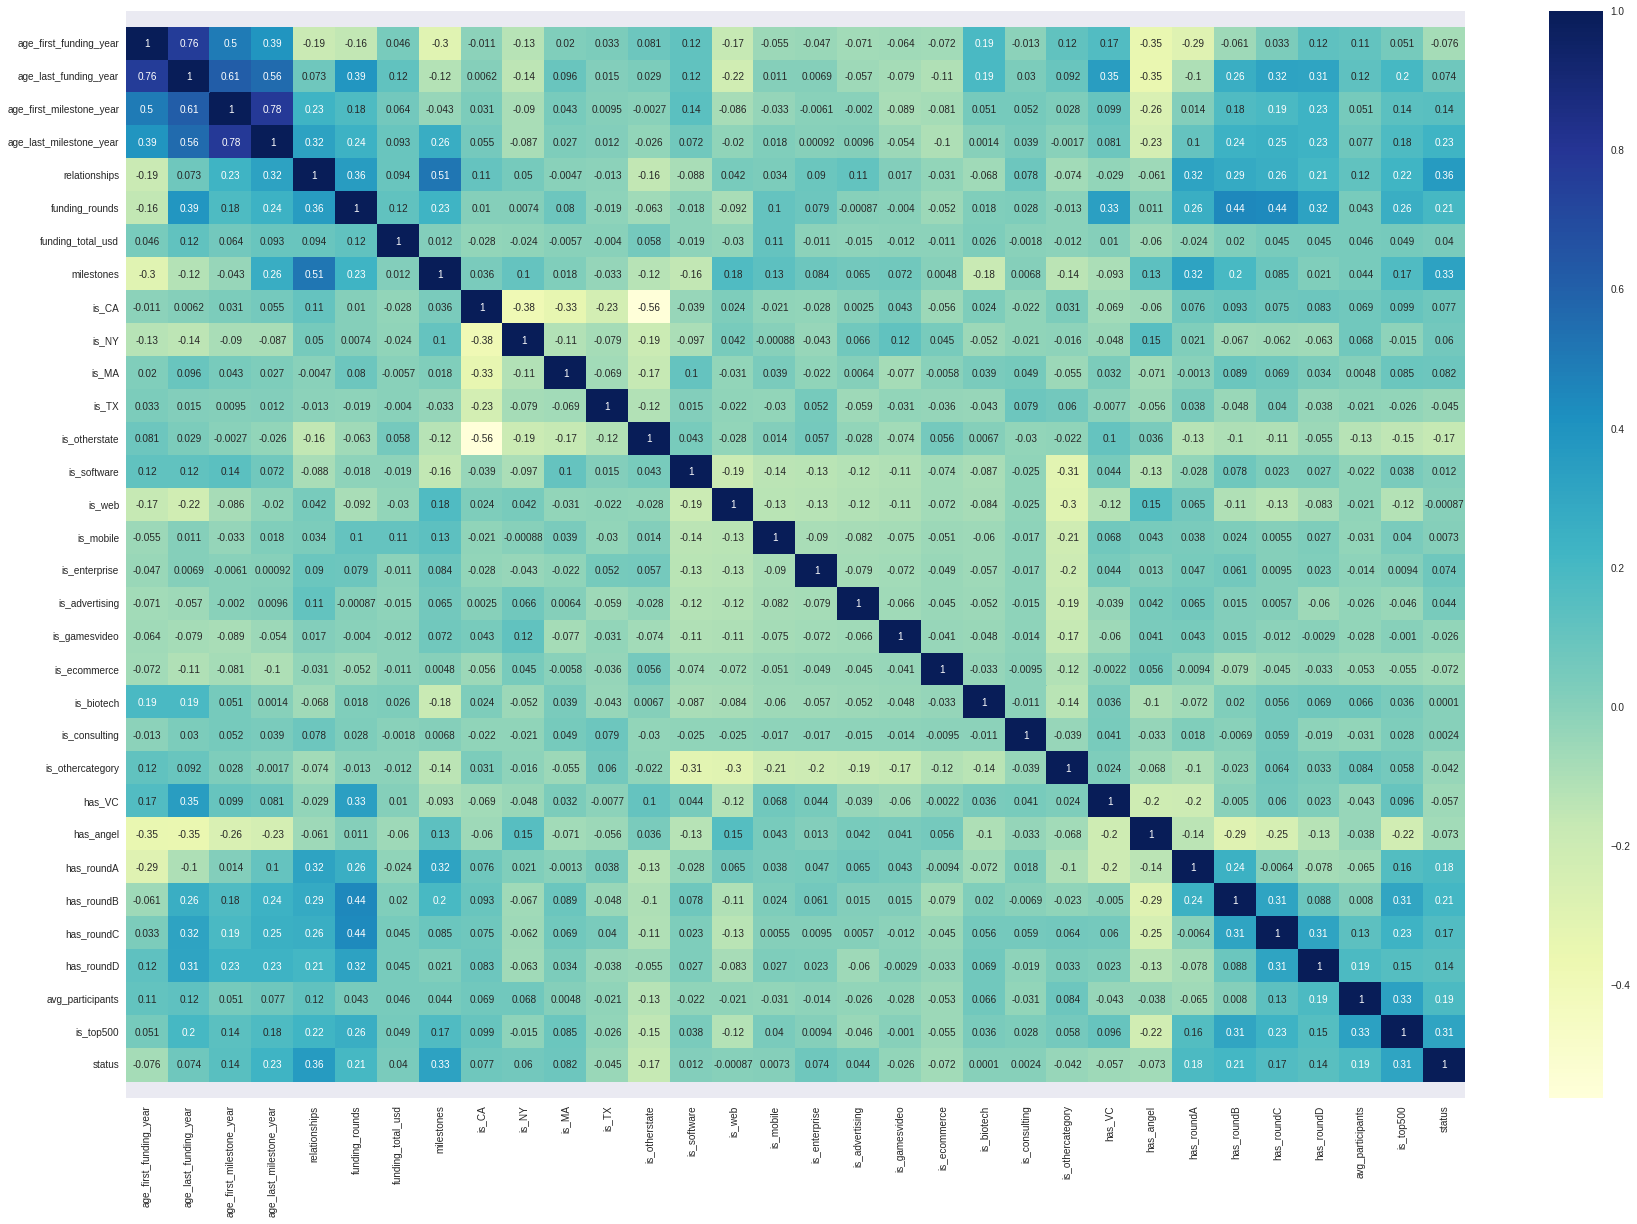

In [ ]:
features = ['age_first_funding_year','age_last_funding_year','age_first_milestone_year','age_last_milestone_year','relationships','funding_rounds','funding_total_usd','milestones','is_CA','is_NY','is_MA','is_TX','is_otherstate','is_software','is_web','is_mobile','is_enterprise','is_advertising','is_gamesvideo','is_ecommerce','is_biotech','is_consulting','is_othercategory','has_VC','has_angel','has_roundA','has_roundB','has_roundC','has_roundD','avg_participants','is_top500','status']

plt.figure(figsize=(30,20))
ax = sns.heatmap(data = df[features].corr(),cmap='YlGnBu',annot=True)

bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5,top - 0.5)

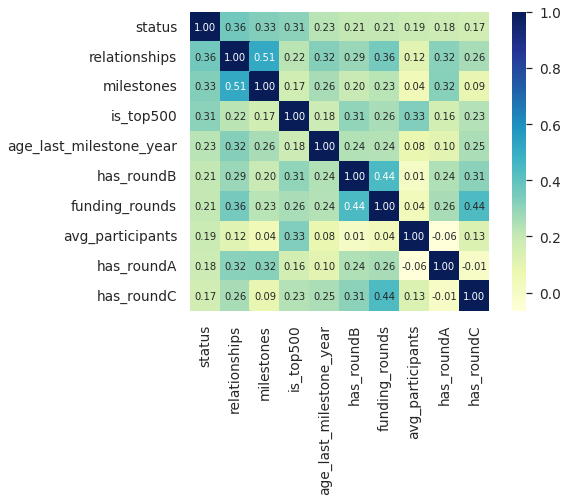

In [ ]:
#number of variables for heatmap
cols = df[features].corr().nlargest(10,'status')['status'].index
cm = np.corrcoef(df[cols].values.T) 
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, cmap='YlGnBu', fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

### Scatter plot

based on the correlation table above which says that 'age_first_funding_year' and 'age_last_funding_year' are very positively correlated. we then verify that by plotting a scatter plot between 'age_first_funding_year' and 'age_last_funding_year' to visualize the relationship between the variables. 

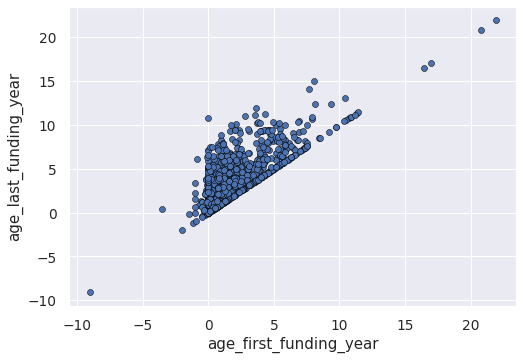

In [ ]:
fig, ax = plt.subplots()
_ = plt.scatter(x=df['age_first_funding_year'], y=df['age_last_funding_year'], edgecolors="#000000", linewidths=0.5)
_ = ax.set(xlabel="age_first_funding_year", ylabel="age_last_funding_year")

We see that 'age_first_funding_year' and 'age_last_funding_year' are strongly positively correlated where as one increases, the other also increases — to a large extent.

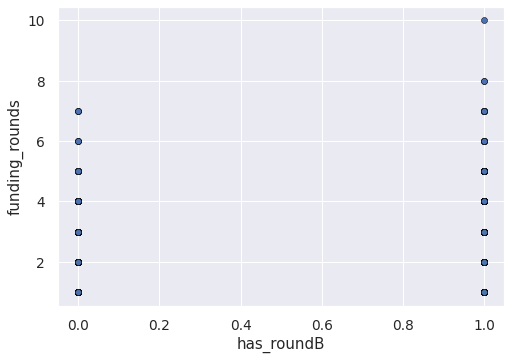

In [ ]:
fig, ax = plt.subplots()
_ = plt.scatter(x=df['has_roundB'], y=df['funding_rounds'], edgecolors="#000000", linewidths=0.5)
_ = ax.set(xlabel="has_roundB", ylabel="funding_rounds")

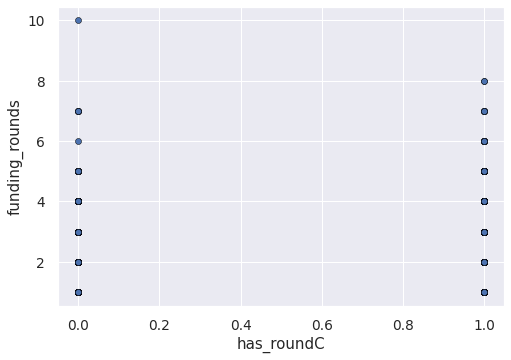

In [ ]:
fig, ax = plt.subplots()
_ = plt.scatter(x=df['has_roundC'], y=df['funding_rounds'], edgecolors="#000000", linewidths=0.5)
_ = ax.set(xlabel="has_roundC", ylabel="funding_rounds")

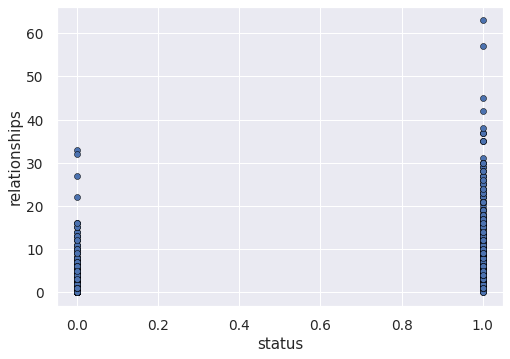

In [ ]:
fig, ax = plt.subplots()
_ = plt.scatter(x=df['status'], y=df['relationships'], edgecolors="#000000", linewidths=0.5)
_ = ax.set(xlabel="status", ylabel="relationships")

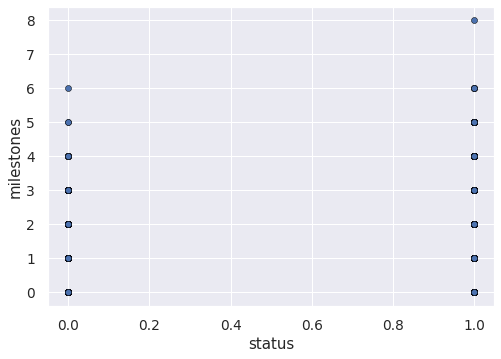

In [ ]:
fig, ax = plt.subplots()
_ = plt.scatter(x=df['status'], y=df['milestones'], edgecolors="#000000", linewidths=0.5)
_ = ax.set(xlabel="status", ylabel="milestones")

### Box plots

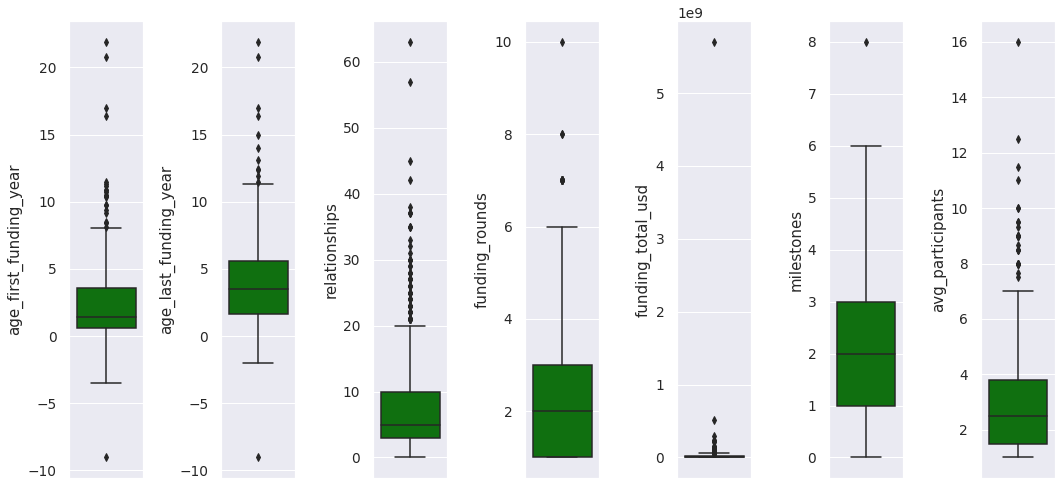

In [ ]:
featuresNum = ['age_first_funding_year','age_last_funding_year','relationships','funding_rounds','funding_total_usd','milestones','avg_participants']

plt.figure(figsize=(15, 7))
for i in range(0, len(featuresNum)):
    plt.subplot(1, len(featuresNum), i+1)
    sns.boxplot(y=df[featuresNum[i]], color='green', orient='v')
    plt.tight_layout()

### Histogram

In [ ]:
df_num.head(3)

,Unnamed: 0,latitude,longitude,labels,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,is_CA,is_NY,is_MA,is_TX,is_otherstate,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500
0,1005,42.358880,-71.056820,1,2.2493,3.0027,4.6685,6.7041,3,3,375000,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1.00,0
1,204,37.238916,-121.973718,1,5.1260,9.9973,7.0055,7.0055,9,4,40100000,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,1,4.75,1
2,1001,32.901049,-117.192656,1,1.0329,1.0329,1.4575,2.2055,5,1,2600000,2,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,4.00,1


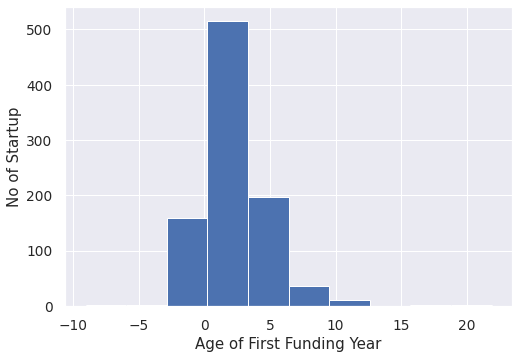

In [ ]:
plt.hist(df['age_first_funding_year'], bins=10)
plt.ylabel('No of Startup')
plt.xlabel('Age of First Funding Year')

plt.show()

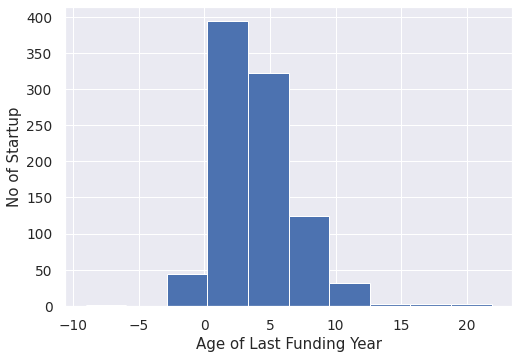

In [ ]:
plt.hist(df['age_last_funding_year'],bins=10)
plt.ylabel('No of Startup')
plt.xlabel('Age of Last Funding Year')
plt.show()

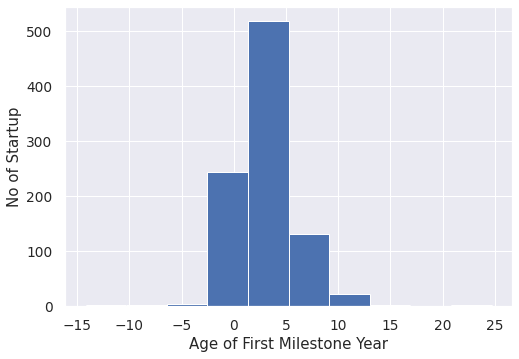

In [ ]:
plt.hist(df['age_first_milestone_year'],bins=10)
plt.ylabel('No of Startup')
plt.xlabel('Age of First Milestone Year')
plt.show()

No handles with labels found to put in legend.


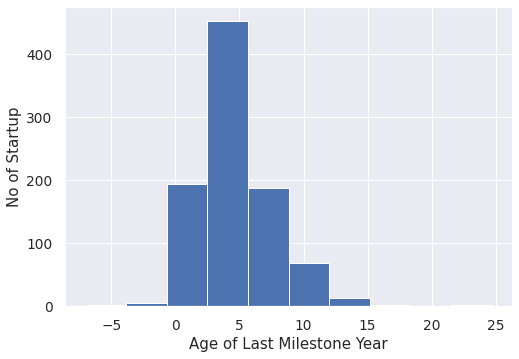

In [ ]:
plt.hist(df['age_last_milestone_year'], bins=10)
plt.ylabel('No of Startup')
plt.xlabel('Age of Last Milestone Year')
plt.legend()
plt.show()

No handles with labels found to put in legend.


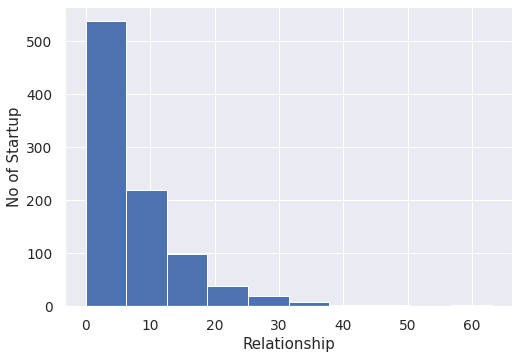

In [ ]:
plt.hist(df['relationships'])
plt.ylabel('No of Startup')
plt.xlabel('Relationship')
plt.legend()
plt.show()

No handles with labels found to put in legend.


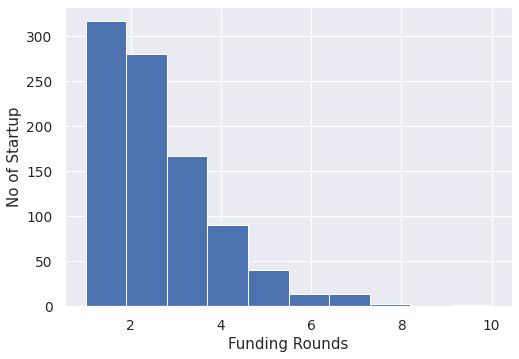

In [ ]:
plt.hist(df['funding_rounds'], bins=10)
plt.ylabel('No of Startup')
plt.xlabel('Funding Rounds')
plt.legend()
plt.show()

No handles with labels found to put in legend.


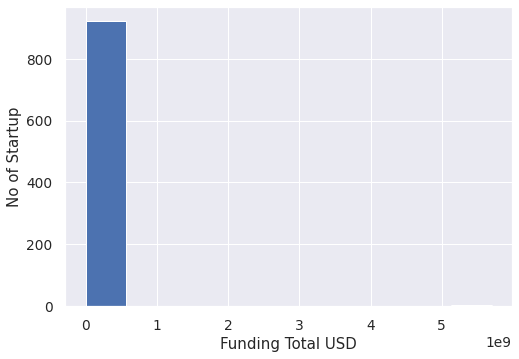

In [ ]:
plt.hist(df['funding_total_usd'], bins=10)
plt.ylabel('No of Startup')
plt.xlabel('Funding Total USD')
plt.legend()
plt.show()

No handles with labels found to put in legend.


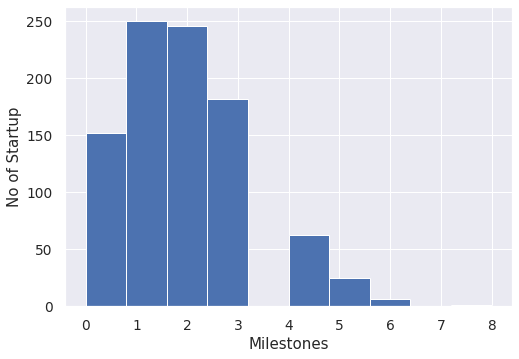

In [ ]:
plt.hist(df['milestones'], bins=10)
plt.ylabel('No of Startup')
plt.xlabel('Milestones')
plt.legend()
plt.show()

No handles with labels found to put in legend.


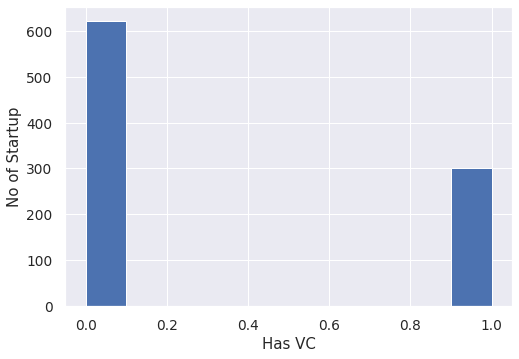

In [ ]:
plt.hist(df['has_VC'], bins=10)
plt.ylabel('No of Startup')
plt.xlabel('Has VC')
plt.legend()
plt.show()

No handles with labels found to put in legend.


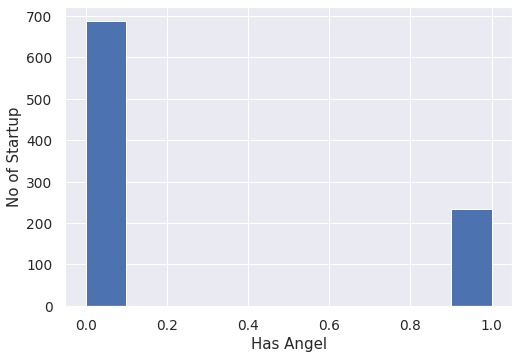

In [ ]:
plt.hist(df['has_angel'], bins=10)
plt.ylabel('No of Startup')
plt.xlabel('Has Angel')
plt.legend()
plt.show()

No handles with labels found to put in legend.


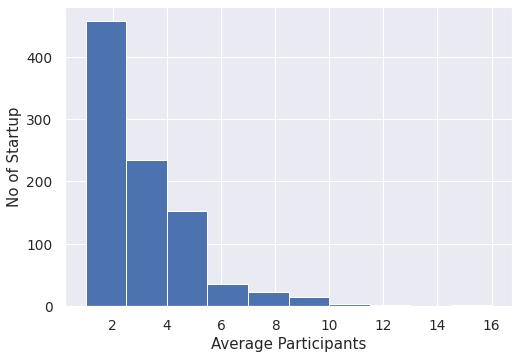

In [ ]:
plt.hist(df['avg_participants'], bins=10)
plt.ylabel('No of Startup')
plt.xlabel('Average Participants')
plt.legend()
plt.show()

No handles with labels found to put in legend.


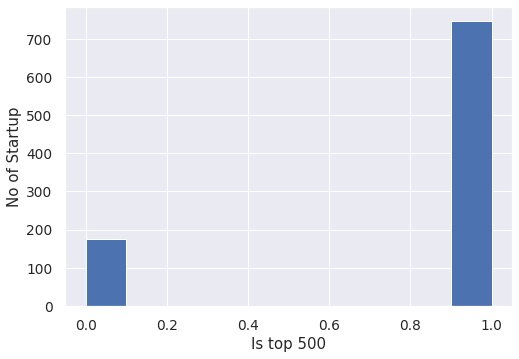

In [ ]:
plt.hist(df['is_top500'], bins=10)
plt.ylabel('No of Startup')
plt.xlabel('Is top 500')
plt.legend()
plt.show()

### Dataset collection founded years

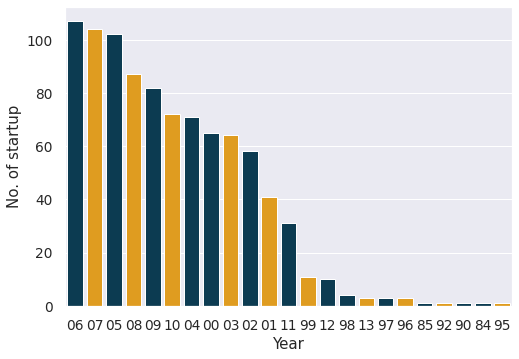

In [ ]:
cdf = df["founded_at"].apply(lambda x: '' + x[-2:]).value_counts() \
            .to_frame().reset_index() \
            .rename(columns={"index": "year", "founded_at": "No_of_startup"})

fig, ax = plt.subplots()
_ = sns.barplot(x="year", y="No_of_startup", data=cdf, 
                palette=sns.color_palette(['#003f5c', '#ffa600'], n_colors=7), ax=ax)
_ = ax.set(xlabel="Year", ylabel="No. of startup")

In [ ]:
df["founded_at"].apply(lambda x: '' + x[-2:]).value_counts(normalize=False)

06    107
07    104
05    102
08     87
09     82
10     72
04     71
00     65
03     64
02     58
01     41
11     31
99     11
12     10
98      4
13      3
97      3
96      3
85      1
92      1
90      1
84      1
95      1
Name: founded_at, dtype: int64

In [ ]:
df["founded_at"].apply(lambda x: '' + x[-2:]).value_counts(normalize=True)

06    0.115926
07    0.112676
05    0.110509
08    0.094258
09    0.088841
10    0.078007
04    0.076923
00    0.070423
03    0.069339
02    0.062839
01    0.044420
11    0.033586
99    0.011918
12    0.010834
98    0.004334
13    0.003250
97    0.003250
96    0.003250
85    0.001083
92    0.001083
90    0.001083
84    0.001083
95    0.001083
Name: founded_at, dtype: float64

In [ ]:
df["closed_at"].apply(lambda x: '' + x[-2:]).value_counts(normalize=True)

13    0.737811
12    0.121343
11    0.053088
10    0.034670
09    0.030336
08    0.016251
07    0.003250
01    0.002167
05    0.001083
Name: closed_at, dtype: float64

###How many Startup are acquired or closed have?

In [ ]:
df_acquired = df[(df["status"] == True)]


In [ ]:
df_acquired.shape

(597, 47)

In [ ]:
df_closed = df[(df["status"] == False)]
df_closed.shape

(326, 47)

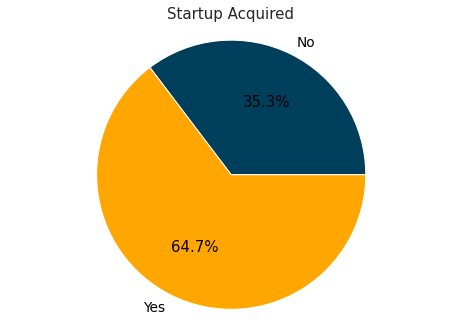

In [ ]:
value_counts = df["status"].value_counts().to_dict()
fig, ax = plt.subplots()
_ = ax.pie(x=[value_counts[False], value_counts[True]], labels=['No', 'Yes'], autopct='%1.1f%%', 
           colors=['#003f5c', '#ffa600'], textprops={'color': '#040204'})
_ = ax.axis('equal')
_ = ax.set_title('Startup Acquired')

### Invest feature acquired check

In [ ]:
coba = df[(df["status"] == 1)]

In [ ]:
features = coba[["has_VC","has_angel","has_roundA","has_roundB","has_roundC","has_roundD"]]

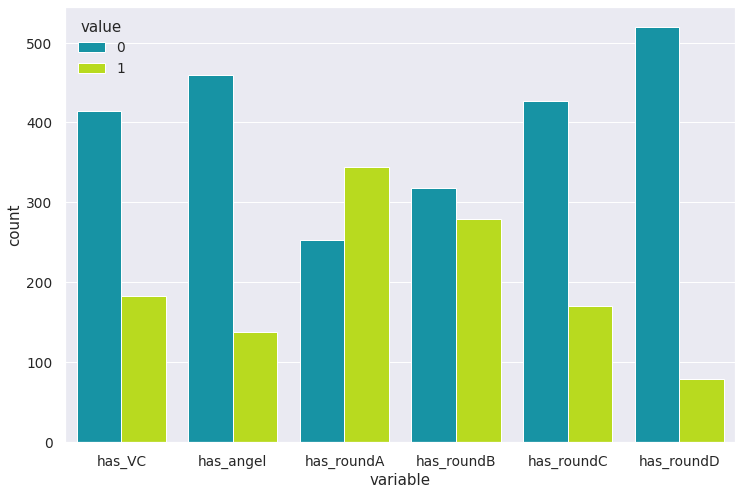

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))

a= np.random.choice(["{}".format(i) for i in [1,2,3,4,5,6]], size=(12,8))
coba = pd.DataFrame(a, columns=["has_{}".format(i) for i in list("features")])

sns.countplot(x="variable", hue="value",palette="nipy_spectral", data=pd.melt(features))

plt.show()

### Which category has the largest number of startup

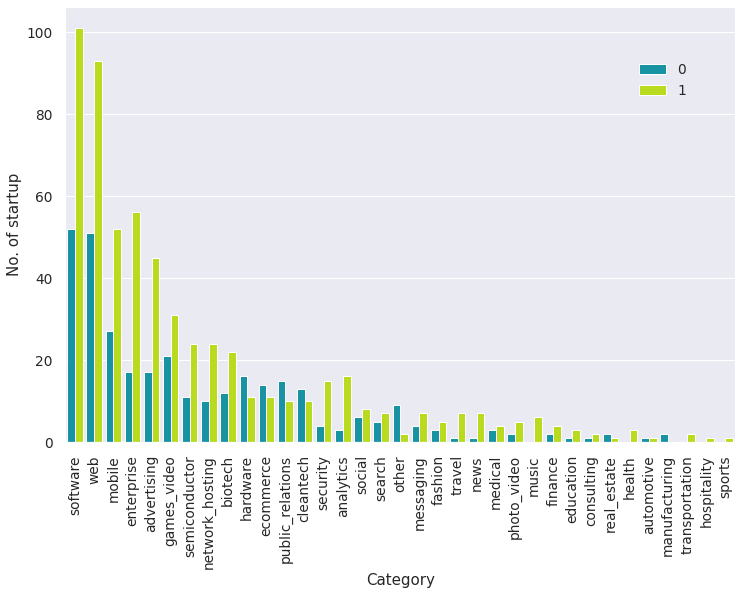

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))

_ = sns.countplot(x="category_code", hue="status", data=df, palette="nipy_spectral",
              order=df.category_code.value_counts().index)

_ = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
_ = ax.set(xlabel="Category", ylabel="No. of startup")
plt.legend(bbox_to_anchor=(0.945, 0.90))

### Which category having most number of total funding

In [ ]:
funding_sorted_category = pd.pivot_table(df,
              index=['category_code'],
              values=['funding_total_usd'],
              aggfunc=['sum']
              ).reset_index()
funding_sorted_category.columns = ['category_code', 'funding_total_usd']
funding_sorted_category = funding_sorted_category.sort_values(['funding_total_usd'], ascending = False)
funding_sorted_category.head(10)

,category_code,funding_total_usd
18,mobile,7263750881
30,software,2657598865
34,web,1729035436
3,biotech,1723699484
8,enterprise,1338882096
4,cleantech,1300284730
28,semiconductor,1105156970
0,advertising,918619012
11,games_video,844643530
12,hardware,773938873


### How many Startup have has_VC?

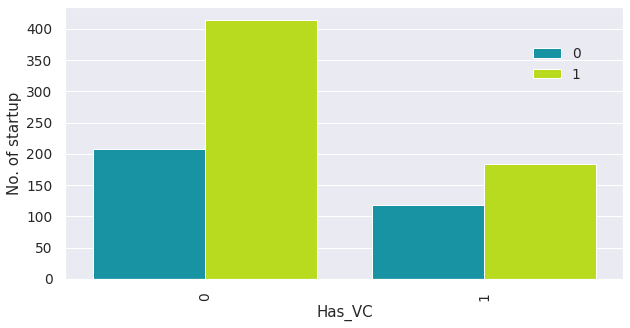

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))

_ = sns.countplot(x="has_VC", hue="status", data=df, palette="nipy_spectral",
              order=df.has_VC.value_counts().index)

_ = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
_ = ax.set(xlabel="Has_VC", ylabel="No. of startup")
plt.legend(bbox_to_anchor=(0.945, 0.90))

### How many Startup have is_top500?

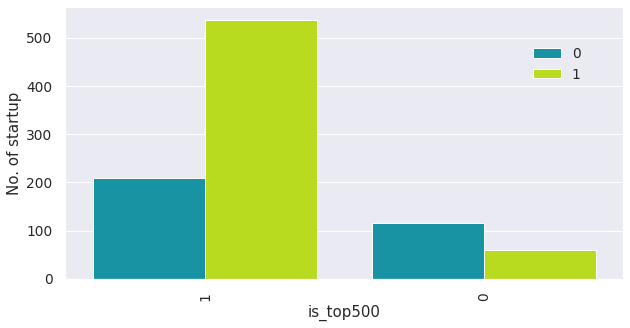

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))

_ = sns.countplot(x="is_top500", hue="status", data=df, palette="nipy_spectral",
              order=df.is_top500.value_counts().index)

_ = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
_ = ax.set(xlabel="is_top500", ylabel="No. of startup")
plt.legend(bbox_to_anchor=(0.945, 0.90))

### How many years on average the company closes

In [ ]:
df_closed.founded_at=pd.to_datetime(df_closed.founded_at)
df_closed.closed_at=pd.to_datetime(df_closed.closed_at)

In [ ]:
df_closed['age_closed_startup'] = df_closed.apply(lambda row: (row.closed_at - row.founded_at) , axis=1)

In [ ]:
df_closed['age_closed_startup'].head()

4    -1259 days
5     2172 days
11     786 days
12    1637 days
15    3482 days
Name: age_closed_startup, dtype: timedelta64[ns]

In [ ]:
df_closed['year'] = df_closed['age_closed_startup'].dt.days /365

In [ ]:
df_closed.head(3)

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,founded_at,closed_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,is_CA,is_NY,is_MA,is_TX,is_otherstate,category_code,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status,age_closed_startup,year
4,1002,CA,37.779281,-122.419236,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,2010-08-01,2007-02-19,08-01-10,04-01-12,0.0000,1.6685,0.0384,0.0384,2,2,1300000,1,1,0,0,0,0,games_video,0,0,0,0,0,1,0,0,0,0,c:65806,1,1,0,0,0,0,1.00,1,0,-1259 days,-3.449315
5,379,CA,37.406914,-122.090370,94043,c:22898,Mountain View,Mountain View CA 94043,Matisse Networks,2002-01-01,2007-12-13,18-07-06,18-07-06,4.5452,4.5452,5.0027,5.0027,3,1,7500000,1,1,0,0,0,0,network_hosting,0,0,0,0,0,0,0,0,0,1,c:22898,0,0,0,1,0,0,3.00,1,0,2172 days,5.950685
11,835,CA,37.452992,-122.185098,94025,c:4829,Menlo Park,Menlo Park CA 94025,Center'd,2006-01-01,2008-02-26,02-01-07,05-03-11,1.0849,5.3370,-0.6164,4.6082,8,5,10400000,2,1,0,0,0,0,web,0,1,0,0,0,0,0,0,0,0,c:4829,1,1,1,0,0,0,1.75,1,0,786 days,2.153425


In [ ]:
(df_closed['age_closed_startup'].mean()) 

Timedelta('2548 days 18:24:17.668711648')

In [ ]:
avg_closed = round(2184 / 365) 
print("Avg. year Startup Closed :", avg_closed ,"year(s)")

Avg. year Startup Closed : 6 year(s)


### how relationship related to acquired or closed startup?

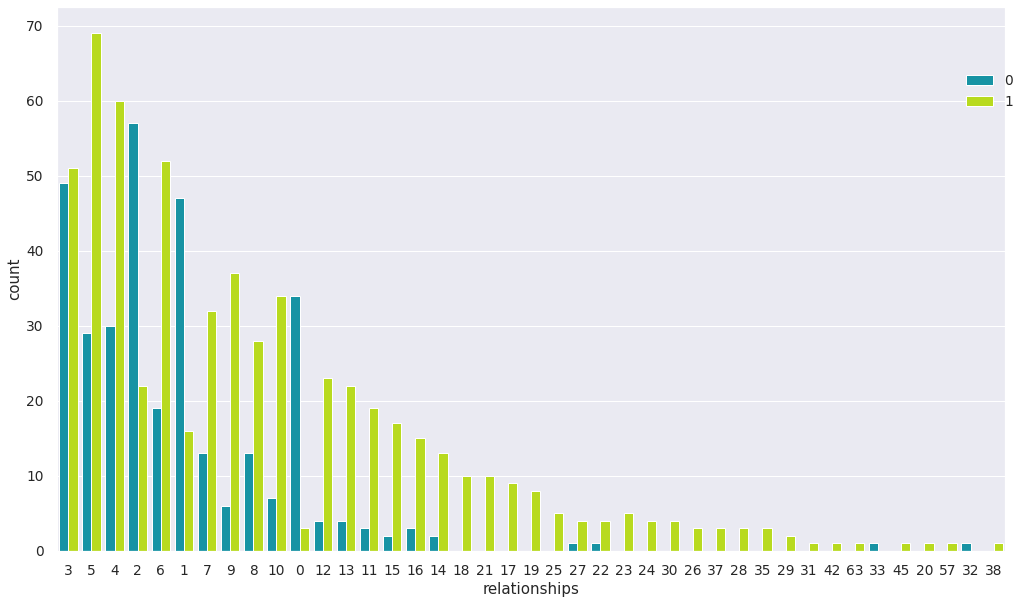

In [ ]:
fig, ax = plt.subplots(figsize=(17,10))

sns.countplot(x="relationships", hue="status", data=df, palette="nipy_spectral",
              order=df.relationships.value_counts().index)
plt.legend(bbox_to_anchor=(0.945, 0.90))

### how funding_rounds related to acquired or closed startup?

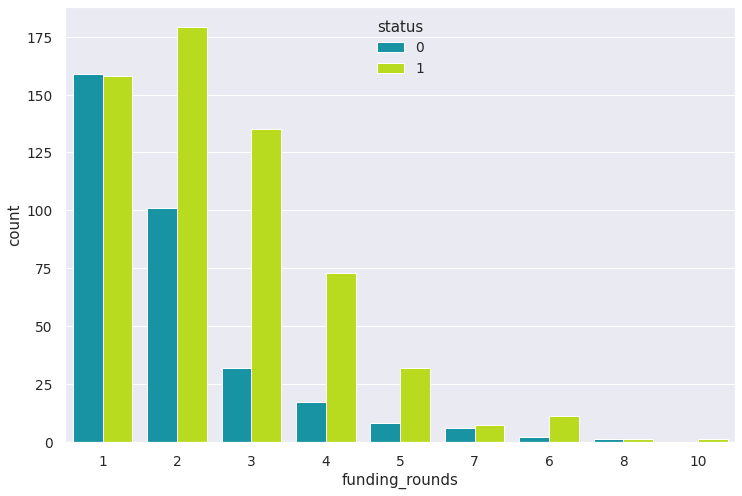

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))

sns.countplot(x="funding_rounds", hue="status", data=df, palette="nipy_spectral",
              order=df.funding_rounds.value_counts().index)
# plt.legend(bbox_to_anchor=(0.945, 0.90))

In [ ]:
!pip install --upgrade geopandas

     |████████████████████████████████| 1.0 MB 4.1 MB/s 
     |████████████████████████████████| 6.3 MB 43.7 MB/s 
     |████████████████████████████████| 16.7 MB 48.9 MB/s 


In [ ]:
pip install pyshp

     |████████████████████████████████| 44 kB 2.3 MB/s 


In [ ]:
import geopandas as gpd
import shapefile as shp

In [ ]:
import sys

In [ ]:
'geopandas' in sys.modules

True

In [ ]:
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.longitude, df.latitude))

# Data Preprocessing

## Duplicate Values

In [ ]:
duplicate = df[df.duplicated()] 
  
print("Duplicate Rows :")

Duplicate Rows :


## Outliers

In [ ]:
#change data type to numerical for boxplot
df['age_first_milestone_year'] = df.age_first_milestone_year.astype(float)
df['age_last_milestone_year'] = df.age_last_milestone_year.astype(float)

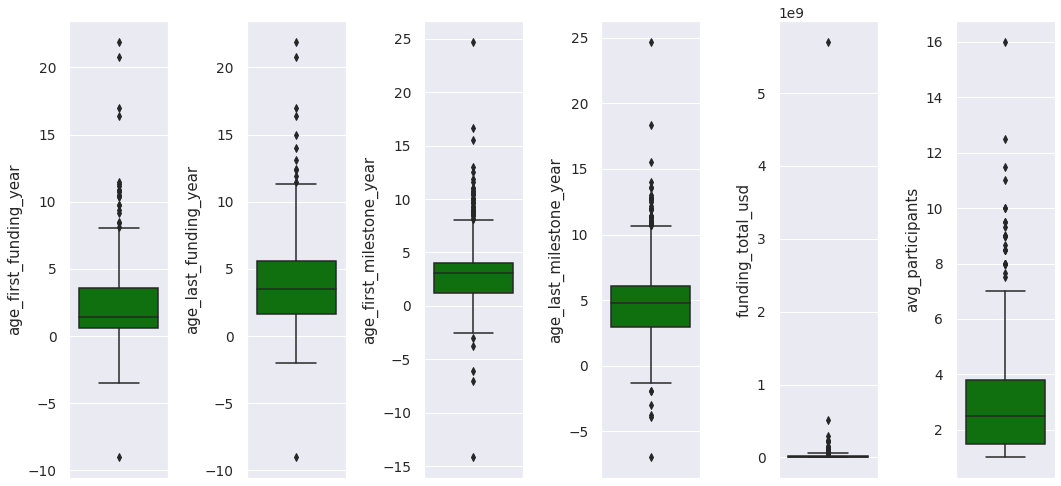

In [ ]:
featuresNumfinal = ['age_first_funding_year','age_last_funding_year','age_first_milestone_year','age_last_milestone_year','funding_total_usd','avg_participants']

plt.figure(figsize=(15, 7))
for i in range(0, len(featuresNumfinal)):
    plt.subplot(1, len(featuresNumfinal), i+1)
    sns.boxplot(y=df[featuresNumfinal[i]], color='green', orient='v')
    plt.tight_layout()

In [ ]:
def drop_outliers(df, field_name):
    iqr = 1.5 * (np.percentile(df[field_name], 75) - np.percentile(df[field_name], 25))
    df.drop(df[df[field_name] > (iqr + np.percentile(df[field_name], 75))].index, inplace=True)
    df.drop(df[df[field_name] < (np.percentile(df[field_name], 25) - iqr)].index, inplace=True)

In [ ]:
drop_outliers(df, 'funding_total_usd')

In [ ]:
df.head()

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,founded_at,closed_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,is_CA,is_NY,is_MA,is_TX,is_otherstate,category_code,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status,geometry
0,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,San Diego CA 92101,Bandsintown,01-01-07,01-01-01,04-01-09,01-01-10,2.2493,3.0027,4.6685,6.7041,3,3,375000,3,1,0,0,0,0,music,0,0,0,0,0,0,0,0,0,1,c:6669,0,1,0,0,0,0,1.0000,0,1,POINT (-71.05682 42.35888)
1,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,Los Gatos CA 95032,TriCipher,01-01-00,02-01-01,14-02-05,28-12-09,5.1260,9.9973,7.0055,7.0055,9,4,40100000,1,1,0,0,0,0,enterprise,0,0,0,1,0,0,0,0,0,0,c:16283,1,0,0,1,1,1,4.7500,1,1,POINT (-121.97372 37.23892)
2,1001,CA,32.901049,-117.192656,92121,c:65620,San Diego,San Diego CA 92121,Plixi,18-03-09,01-01-05,30-03-10,30-03-10,1.0329,1.0329,1.4575,2.2055,5,1,2600000,2,1,0,0,0,0,web,0,1,0,0,0,0,0,0,0,0,c:65620,0,0,1,0,0,0,4.0000,1,1,POINT (-117.19266 32.90105)
3,738,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Cupertino CA 95014,Solidcore Systems,01-01-02,01-01-07,17-02-05,25-04-07,3.1315,5.3151,6.0027,6.0027,5,3,40000000,1,1,0,0,0,0,software,1,0,0,0,0,0,0,0,0,0,c:42668,0,0,0,1,1,1,3.3333,1,1,POINT (-122.05004 37.32031)
4,1002,CA,37.779281,-122.419236,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,08-01-10,19-02-07,08-01-10,04-01-12,0.0000,1.6685,0.0384,0.0384,2,2,1300000,1,1,0,0,0,0,games_video,0,0,0,0,0,1,0,0,0,0,c:65806,1,1,0,0,0,0,1.0000,1,0,POINT (-122.41924 37.77928)


## Negative value

In [ ]:
age=["age_first_funding_year","age_last_funding_year","age_first_milestone_year","age_last_milestone_year"]

for a in range(len(age)):
    print("Is there any negative value in '{}' column  : {} ".format(age[a],(df[age[a]]<0).any()))

Is there any negative value in 'age_first_funding_year' column  : True 
Is there any negative value in 'age_last_funding_year' column  : True 
Is there any negative value in 'age_first_milestone_year' column  : True 
Is there any negative value in 'age_last_milestone_year' column  : True 


In [ ]:
df=df.drop(df[df.age_first_funding_year<0].index)
df=df.drop(df[df.age_last_funding_year<0].index)
df=df.drop(df[df.age_first_milestone_year<0].index)
df=df.drop(df[df.age_last_milestone_year<0].index)

In [ ]:
for a in range(len(age)):
    print("Is there any negative value in '{}' column  : {} ".format(age[a],(df[age[a]]<0).any()))

Is there any negative value in 'age_first_funding_year' column  : False 
Is there any negative value in 'age_last_funding_year' column  : False 
Is there any negative value in 'age_first_milestone_year' column  : False 
Is there any negative value in 'age_last_milestone_year' column  : False 


# Feature Engineering

## New Column "has_RoundABCD"

In [ ]:
df['has_RoundABCD'] = np.where((df['has_roundA'] == 1) | (df['has_roundB'] == 1) | (df['has_roundC'] == 1) | (df['has_roundD'] == 1), 1, 0)
df.head()

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,founded_at,closed_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,is_CA,is_NY,is_MA,is_TX,is_otherstate,category_code,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status,geometry,has_RoundABCD
0,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,San Diego CA 92101,Bandsintown,01-01-07,01-01-01,04-01-09,01-01-10,2.2493,3.0027,4.6685,6.7041,3,3,375000,3,1,0,0,0,0,music,0,0,0,0,0,0,0,0,0,1,c:6669,0,1,0,0,0,0,1.0000,0,1,POINT (-71.05682 42.35888),0
1,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,Los Gatos CA 95032,TriCipher,01-01-00,02-01-01,14-02-05,28-12-09,5.1260,9.9973,7.0055,7.0055,9,4,40100000,1,1,0,0,0,0,enterprise,0,0,0,1,0,0,0,0,0,0,c:16283,1,0,0,1,1,1,4.7500,1,1,POINT (-121.97372 37.23892),1
2,1001,CA,32.901049,-117.192656,92121,c:65620,San Diego,San Diego CA 92121,Plixi,18-03-09,01-01-05,30-03-10,30-03-10,1.0329,1.0329,1.4575,2.2055,5,1,2600000,2,1,0,0,0,0,web,0,1,0,0,0,0,0,0,0,0,c:65620,0,0,1,0,0,0,4.0000,1,1,POINT (-117.19266 32.90105),1
3,738,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Cupertino CA 95014,Solidcore Systems,01-01-02,01-01-07,17-02-05,25-04-07,3.1315,5.3151,6.0027,6.0027,5,3,40000000,1,1,0,0,0,0,software,1,0,0,0,0,0,0,0,0,0,c:42668,0,0,0,1,1,1,3.3333,1,1,POINT (-122.05004 37.32031),1
4,1002,CA,37.779281,-122.419236,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,08-01-10,19-02-07,08-01-10,04-01-12,0.0000,1.6685,0.0384,0.0384,2,2,1300000,1,1,0,0,0,0,games_video,0,0,0,0,0,1,0,0,0,0,c:65806,1,1,0,0,0,0,1.0000,1,0,POINT (-122.41924 37.77928),0


## New Column "has_Investor"

In [ ]:
df['has_Investor'] = np.where((df['has_VC'] == 1) | (df['has_angel'] == 1), 1, 0)
df.head()

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,founded_at,closed_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,is_CA,is_NY,is_MA,is_TX,is_otherstate,category_code,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status,geometry,has_RoundABCD,has_Investor
0,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,San Diego CA 92101,Bandsintown,01-01-07,01-01-01,04-01-09,01-01-10,2.2493,3.0027,4.6685,6.7041,3,3,375000,3,1,0,0,0,0,music,0,0,0,0,0,0,0,0,0,1,c:6669,0,1,0,0,0,0,1.0000,0,1,POINT (-71.05682 42.35888),0,1
1,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,Los Gatos CA 95032,TriCipher,01-01-00,02-01-01,14-02-05,28-12-09,5.1260,9.9973,7.0055,7.0055,9,4,40100000,1,1,0,0,0,0,enterprise,0,0,0,1,0,0,0,0,0,0,c:16283,1,0,0,1,1,1,4.7500,1,1,POINT (-121.97372 37.23892),1,1
2,1001,CA,32.901049,-117.192656,92121,c:65620,San Diego,San Diego CA 92121,Plixi,18-03-09,01-01-05,30-03-10,30-03-10,1.0329,1.0329,1.4575,2.2055,5,1,2600000,2,1,0,0,0,0,web,0,1,0,0,0,0,0,0,0,0,c:65620,0,0,1,0,0,0,4.0000,1,1,POINT (-117.19266 32.90105),1,0
3,738,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Cupertino CA 95014,Solidcore Systems,01-01-02,01-01-07,17-02-05,25-04-07,3.1315,5.3151,6.0027,6.0027,5,3,40000000,1,1,0,0,0,0,software,1,0,0,0,0,0,0,0,0,0,c:42668,0,0,0,1,1,1,3.3333,1,1,POINT (-122.05004 37.32031),1,0
4,1002,CA,37.779281,-122.419236,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,08-01-10,19-02-07,08-01-10,04-01-12,0.0000,1.6685,0.0384,0.0384,2,2,1300000,1,1,0,0,0,0,games_video,0,0,0,0,0,1,0,0,0,0,c:65806,1,1,0,0,0,0,1.0000,1,0,POINT (-122.41924 37.77928),0,1


In [ ]:
len(df[(df["has_RoundABCD"] == 1)].index)

577

In [ ]:
len(df[ (df['has_RoundABCD']  == 1) & (df['status']  == 1) ].index)

410

In [ ]:
len(df)

775

## New Column "has_Investor"

In [ ]:
df['has_Investor'] = np.where((df['has_VC'] == 1) | (df['has_angel'] == 1), 1, 0)
df.head()

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,founded_at,closed_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,is_CA,is_NY,is_MA,is_TX,is_otherstate,category_code,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status,geometry,has_RoundABCD,has_Investor
0,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,San Diego CA 92101,Bandsintown,01-01-07,01-01-01,04-01-09,01-01-10,2.2493,3.0027,4.6685,6.7041,3,3,375000,3,1,0,0,0,0,music,0,0,0,0,0,0,0,0,0,1,c:6669,0,1,0,0,0,0,1.0000,0,1,POINT (-71.05682 42.35888),0,1
1,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,Los Gatos CA 95032,TriCipher,01-01-00,02-01-01,14-02-05,28-12-09,5.1260,9.9973,7.0055,7.0055,9,4,40100000,1,1,0,0,0,0,enterprise,0,0,0,1,0,0,0,0,0,0,c:16283,1,0,0,1,1,1,4.7500,1,1,POINT (-121.97372 37.23892),1,1
2,1001,CA,32.901049,-117.192656,92121,c:65620,San Diego,San Diego CA 92121,Plixi,18-03-09,01-01-05,30-03-10,30-03-10,1.0329,1.0329,1.4575,2.2055,5,1,2600000,2,1,0,0,0,0,web,0,1,0,0,0,0,0,0,0,0,c:65620,0,0,1,0,0,0,4.0000,1,1,POINT (-117.19266 32.90105),1,0
3,738,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Cupertino CA 95014,Solidcore Systems,01-01-02,01-01-07,17-02-05,25-04-07,3.1315,5.3151,6.0027,6.0027,5,3,40000000,1,1,0,0,0,0,software,1,0,0,0,0,0,0,0,0,0,c:42668,0,0,0,1,1,1,3.3333,1,1,POINT (-122.05004 37.32031),1,0
4,1002,CA,37.779281,-122.419236,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,08-01-10,19-02-07,08-01-10,04-01-12,0.0000,1.6685,0.0384,0.0384,2,2,1300000,1,1,0,0,0,0,games_video,0,0,0,0,0,1,0,0,0,0,c:65806,1,1,0,0,0,0,1.0000,1,0,POINT (-122.41924 37.77928),0,1


In [ ]:
len(df[(df["has_RoundABCD"] == 1)].index)

577

In [ ]:
len(df[ (df['has_RoundABCD']  == 1) & (df['status']  == 1) ].index)

410

In [ ]:
len(df)

775

## New Column "has_Seed"

In [ ]:
df['has_Seed'] = np.where((df['has_RoundABCD'] == 0) & (df['has_Investor'] == 1), 1, 0)
df.head()

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,founded_at,closed_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,is_CA,is_NY,is_MA,is_TX,is_otherstate,category_code,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status,geometry,has_RoundABCD,has_Investor,has_Seed
0,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,San Diego CA 92101,Bandsintown,01-01-07,01-01-01,04-01-09,01-01-10,2.2493,3.0027,4.6685,6.7041,3,3,375000,3,1,0,0,0,0,music,0,0,0,0,0,0,0,0,0,1,c:6669,0,1,0,0,0,0,1.0000,0,1,POINT (-71.05682 42.35888),0,1,1
1,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,Los Gatos CA 95032,TriCipher,01-01-00,02-01-01,14-02-05,28-12-09,5.1260,9.9973,7.0055,7.0055,9,4,40100000,1,1,0,0,0,0,enterprise,0,0,0,1,0,0,0,0,0,0,c:16283,1,0,0,1,1,1,4.7500,1,1,POINT (-121.97372 37.23892),1,1,0
2,1001,CA,32.901049,-117.192656,92121,c:65620,San Diego,San Diego CA 92121,Plixi,18-03-09,01-01-05,30-03-10,30-03-10,1.0329,1.0329,1.4575,2.2055,5,1,2600000,2,1,0,0,0,0,web,0,1,0,0,0,0,0,0,0,0,c:65620,0,0,1,0,0,0,4.0000,1,1,POINT (-117.19266 32.90105),1,0,0
3,738,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Cupertino CA 95014,Solidcore Systems,01-01-02,01-01-07,17-02-05,25-04-07,3.1315,5.3151,6.0027,6.0027,5,3,40000000,1,1,0,0,0,0,software,1,0,0,0,0,0,0,0,0,0,c:42668,0,0,0,1,1,1,3.3333,1,1,POINT (-122.05004 37.32031),1,0,0
4,1002,CA,37.779281,-122.419236,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,08-01-10,19-02-07,08-01-10,04-01-12,0.0000,1.6685,0.0384,0.0384,2,2,1300000,1,1,0,0,0,0,games_video,0,0,0,0,0,1,0,0,0,0,c:65806,1,1,0,0,0,0,1.0000,1,0,POINT (-122.41924 37.77928),0,1,1


In [ ]:
df['has_Seed'] == 1

0       True
1      False
2      False
3      False
4       True
5      False
6      False
7      False
8      False
9      False
10     False
12      True
13     False
14     False
15      True
16     False
18     False
19     False
20     False
21     False
22     False
24     False
25     False
26     False
27     False
29      True
30     False
31     False
33      True
34      True
35     False
36     False
37     False
38     False
39     False
40     False
41      True
42     False
43     False
44     False
45     False
46     False
47     False
48      True
49     False
50     False
51     False
52     False
53     False
54     False
55     False
56     False
57     False
58     False
59     False
61     False
62     False
63      True
64     False
65     False
66      True
67      True
68     False
69     False
70     False
72      True
73     False
74     False
75     False
76      True
77     False
78     False
81     False
83     False
84     False
85     False
86     False

In [ ]:
len(df[(df["has_Seed"] == 1)].index)

174

## New Column "invalid_startup"

In [ ]:
df['invalid_startup'] = np.where((df['has_RoundABCD'] == 0) & (df['has_VC'] == 0) & (df['has_angel'] == 0), 1, 0)
df.head()

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,founded_at,closed_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,is_CA,is_NY,is_MA,is_TX,is_otherstate,category_code,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status,geometry,has_RoundABCD,has_Investor,has_Seed,invalid_startup
0,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,San Diego CA 92101,Bandsintown,01-01-07,01-01-01,04-01-09,01-01-10,2.2493,3.0027,4.6685,6.7041,3,3,375000,3,1,0,0,0,0,music,0,0,0,0,0,0,0,0,0,1,c:6669,0,1,0,0,0,0,1.0000,0,1,POINT (-71.05682 42.35888),0,1,1,0
1,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,Los Gatos CA 95032,TriCipher,01-01-00,02-01-01,14-02-05,28-12-09,5.1260,9.9973,7.0055,7.0055,9,4,40100000,1,1,0,0,0,0,enterprise,0,0,0,1,0,0,0,0,0,0,c:16283,1,0,0,1,1,1,4.7500,1,1,POINT (-121.97372 37.23892),1,1,0,0
2,1001,CA,32.901049,-117.192656,92121,c:65620,San Diego,San Diego CA 92121,Plixi,18-03-09,01-01-05,30-03-10,30-03-10,1.0329,1.0329,1.4575,2.2055,5,1,2600000,2,1,0,0,0,0,web,0,1,0,0,0,0,0,0,0,0,c:65620,0,0,1,0,0,0,4.0000,1,1,POINT (-117.19266 32.90105),1,0,0,0
3,738,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Cupertino CA 95014,Solidcore Systems,01-01-02,01-01-07,17-02-05,25-04-07,3.1315,5.3151,6.0027,6.0027,5,3,40000000,1,1,0,0,0,0,software,1,0,0,0,0,0,0,0,0,0,c:42668,0,0,0,1,1,1,3.3333,1,1,POINT (-122.05004 37.32031),1,0,0,0
4,1002,CA,37.779281,-122.419236,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,08-01-10,19-02-07,08-01-10,04-01-12,0.0000,1.6685,0.0384,0.0384,2,2,1300000,1,1,0,0,0,0,games_video,0,0,0,0,0,1,0,0,0,0,c:65806,1,1,0,0,0,0,1.0000,1,0,POINT (-122.41924 37.77928),0,1,1,0


In [ ]:
len(df[(df["invalid_startup"] == 1)].index)

24

##  New Column "age_of_startup

In [ ]:
df.founded_at=pd.to_datetime(df.founded_at)
df.closed_at=pd.to_datetime(df.closed_at)

In [ ]:
df['age_closed_startup'] = df.apply(lambda row: (row.closed_at - row.founded_at) , axis=1)

In [ ]:
df['age_closed_startup'].head()

0   -2191 days
1     397 days
2   -1537 days
3    1826 days
4   -1259 days
Name: age_closed_startup, dtype: timedelta64[ns]

In [ ]:
df['startUp_age_year'] = df['age_closed_startup'].dt.days /365

In [ ]:
df["startUp_age_year"]

0      -6.002740
1       1.087671
2      -4.210959
3       5.002740
4      -3.449315
5       5.950685
6       3.000000
7       4.002740
8       6.334247
9       3.336986
10      8.052055
12      4.484932
13      0.200000
14      7.350685
15      9.539726
16      5.567123
18     -1.213699
19      1.443836
20      7.698630
21      5.005479
22      7.005479
24      1.920548
25      7.586301
26      6.586301
27      1.334247
29      3.761644
30      2.093151
31      8.339726
33     -1.778082
34     -0.076712
35      4.797260
36      2.309589
37      4.378082
38      0.632877
39      3.230137
40      3.213699
41     -1.967123
42      1.654795
43      5.432877
44      7.808219
45      6.613699
46     -0.800000
47     -0.600000
48     -0.413699
49      7.257534
50      4.002740
51      1.000000
52      5.169863
53     10.093151
54      3.835616
55      6.334247
56      4.331507
57      5.583562
58      3.254795
59      9.734247
61      5.010959
62      9.175342
63      9.342466
64      1.3726

## Drop unused column for modelling

In [ ]:
df = df.drop(['state_code','id','Unnamed: 6','category_code','object_id'],axis=1)
df = df.drop(['zip_code','founded_at','closed_at','first_funding_at','last_funding_at','city','name'],axis=1)
df = df.drop(['Unnamed: 0'],axis=1)
df = df.drop(['latitude','longitude'],axis=1)
df = df.drop(['geometry'],axis=1)
df = df.drop(['is_CA','is_NY','is_MA','is_TX','is_otherstate'],axis=1)
df = df.drop(['age_closed_startup'],axis=1)
df = df.drop(df[df.startUp_age_year<0].index)

In [ ]:
df.head()

,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status,has_RoundABCD,has_Investor,has_Seed,invalid_startup,startUp_age_year
1,5.1260,9.9973,7.0055,7.0055,9,4,40100000,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,1,4.7500,1,1,1,1,0,0,1.087671
3,3.1315,5.3151,6.0027,6.0027,5,3,40000000,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,3.3333,1,1,1,0,0,0,5.002740
5,4.5452,4.5452,5.0027,5.0027,3,1,7500000,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,3.0000,1,0,1,0,0,0,5.950685
6,1.7205,5.2110,3.0000,6.6082,6,3,26000000,2,1,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,1.6667,1,1,1,1,0,0,3.000000
7,1.6466,6.7616,5.6055,7.3616,25,3,34100000,3,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,1,3.5000,1,1,1,0,0,0,4.002740


In [ ]:
from sklearn import preprocessing

x = df.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled,columns=df.columns)
df.head()

,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status,has_RoundABCD,has_Investor,has_Seed,invalid_startup,startUp_age_year
0,0.234108,0.456583,0.283797,0.283797,0.142857,0.333333,0.697333,0.125,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.250000,1.0,1.0,1.0,1.0,0.0,0.0,0.030363
1,0.143018,0.242744,0.243173,0.243173,0.079365,0.222222,0.695594,0.125,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.155553,1.0,1.0,1.0,0.0,0.0,0.0,0.164277
2,0.207582,0.207582,0.202662,0.202662,0.047619,0.000000,0.130268,0.125,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.133333,1.0,0.0,1.0,0.0,0.0,0.0,0.196701
3,0.078576,0.237990,0.121532,0.267702,0.095238,0.222222,0.452069,0.250,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.044447,1.0,1.0,1.0,1.0,0.0,0.0,0.095774
4,0.075201,0.308807,0.227082,0.298223,0.396825,0.222222,0.592966,0.375,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.166667,1.0,1.0,1.0,0.0,0.0,0.0,0.130072


In [ ]:
df.to_csv(r'/content/processed data.csv', index = False)

In [ ]:
df.describe()

,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status,has_RoundABCD,has_Investor,has_Seed,invalid_startup,startUp_age_year
count,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000,7.630000e+02,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000
mean,2.461533,3.978121,3.256986,4.825976,7.326343,2.165138,1.385673e+07,1.794233,0.182176,0.152031,0.073394,0.078637,0.073394,0.055046,0.027523,0.028834,0.003932,0.325033,0.311927,0.237221,0.511140,0.389253,0.209699,0.077326,2.821692,0.819135,0.642202,0.750983,0.511140,0.217562,0.031455,7.339055
std,2.548945,2.896189,2.545023,2.804539,6.736485,1.262831,1.362831e+07,1.322476,0.386242,0.359287,0.260954,0.269348,0.260954,0.228219,0.163709,0.167448,0.062622,0.468694,0.463584,0.425658,0.500204,0.487901,0.407360,0.267284,1.886243,0.385159,0.479667,0.432727,0.500204,0.412859,0.174658,3.682235
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.100000e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000
25%,0.694550,1.868500,1.584950,3.002700,3.000000,1.000000,3.000000e+06,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.500000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,4.542466
50%,1.665800,3.512300,3.055353,4.754423,5.000000,2.000000,1.000000e+07,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.333300,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,7.005479
75%,3.826050,5.547950,4.002700,6.005500,10.000000,3.000000,2.148500e+07,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,3.666700,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,9.546575
max,21.895900,21.895900,24.684900,24.684900,63.000000,10.000000,5.750000e+07,8.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,16.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,29.435616
